In [44]:
import pandas as pd

# Load the training dataset
train_df = pd.read_csv("/content/drive/MyDrive/Bank_Classification_Data/C&T train dataset.csv")

# Load the test dataset
test_df = pd.read_csv("/content/drive/MyDrive/Bank_Classification_Data/C&T test dataset.csv")

# Display the first few rows of the training dataset to verify the loading
print("Training Dataset:")
print(train_df.head())

# Display the first few rows of the test dataset to verify the loading
print("\nTest Dataset:")
print(test_df.head())


Training Dataset:
   sno acc_info  duration_month credit_history purpose savings_acc  \
0    1      A11               6            A34     A43         A65   
1    2      A12              48            A32     A43         A61   
2    3      A14              12            A34     A46         A61   
3    4      A11              42            A32     A42         A61   
4    5      A11              24            A33     A40         A61   

  employment_st  poi personal_status gurantors  ...  property_type   age  \
0           A75  4.0             A93      A101  ...           A121  67.0   
1           A73  2.0             A92      A101  ...           A121  22.0   
2           A74  2.0             A93      A101  ...           A121  49.0   
3           A74  2.0             A93      A103  ...           A122  45.0   
4           A73  3.0             A93      A101  ...           A124  53.0   

   installment_type housing_type credits_no  job_type liables  telephone  \
0              A143         

In [45]:
print(train_df.head())

   sno acc_info  duration_month credit_history purpose savings_acc  \
0    1      A11               6            A34     A43         A65   
1    2      A12              48            A32     A43         A61   
2    3      A14              12            A34     A46         A61   
3    4      A11              42            A32     A42         A61   
4    5      A11              24            A33     A40         A61   

  employment_st  poi personal_status gurantors  ...  property_type   age  \
0           A75  4.0             A93      A101  ...           A121  67.0   
1           A73  2.0             A92      A101  ...           A121  22.0   
2           A74  2.0             A93      A101  ...           A121  49.0   
3           A74  2.0             A93      A103  ...           A122  45.0   
4           A73  3.0             A93      A101  ...           A124  53.0   

   installment_type housing_type credits_no  job_type liables  telephone  \
0              A143         A152          2   

In [46]:
print(train_df.columns)

Index(['sno', 'acc_info', 'duration_month', 'credit_history', 'purpose',
       'savings_acc', 'employment_st', 'poi', 'personal_status', 'gurantors',
       'resident_since', 'property_type', 'age', 'installment_type',
       'housing_type', 'credits_no', 'job_type', 'liables', 'telephone',
       'foreigner', 'Group_no'],
      dtype='object')


In [47]:
train_df.isna().sum()

sno                  0
acc_info             0
duration_month       0
credit_history       0
purpose              0
savings_acc          0
employment_st        8
poi                 12
personal_status      0
gurantors            8
resident_since       0
property_type        0
age                  4
installment_type     0
housing_type         7
credits_no           0
job_type             0
liables              0
telephone            0
foreigner            0
Group_no             0
dtype: int64

We can directly observer that we have some columns where there are missing values

In [48]:
from sklearn.impute import SimpleImputer

# Impute missing values in numerical columns with median
numerical_cols = ['poi', 'age', 'liables']
numerical_imputer = SimpleImputer(strategy='median')
train_df[numerical_cols] = numerical_imputer.fit_transform(train_df[numerical_cols])

# Impute missing values in categorical columns with mode
categorical_cols = ['employment_st', 'gurantors', 'housing_type']
categorical_imputer = SimpleImputer(strategy='most_frequent')
train_df[categorical_cols] = categorical_imputer.fit_transform(train_df[categorical_cols])

# Verify that there are no more missing values
print("Missing Values after Imputation:")
print(train_df.isnull().sum())


Missing Values after Imputation:
sno                 0
acc_info            0
duration_month      0
credit_history      0
purpose             0
savings_acc         0
employment_st       0
poi                 0
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 0
installment_type    0
housing_type        0
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
Group_no            0
dtype: int64


In [49]:
train_df.value_counts()

sno  acc_info  duration_month  credit_history  purpose  savings_acc  employment_st  poi  personal_status  gurantors  resident_since  property_type  age   installment_type  housing_type  credits_no  job_type  liables  telephone  foreigner  Group_no
1    A11       6               A34             A43      A65          A75            4.0  A93              A101       4               A121           67.0  A143              A152          2           A173      1.0      A192       A201       3           1
538  A12       18              A34             A42      A61          A75            3.0  A92              A101       4               A122           37.0  A143              A152          1           A173      1.0      A192       A201       2           1
528  A14       4               A34             A43      A61          A74            2.0  A93              A101       1               A121           42.0  A143              A152          2           A172      2.0      A191       A201       2      

In [50]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               800 non-null    int64  
 1   acc_info          800 non-null    object 
 2   duration_month    800 non-null    int64  
 3   credit_history    800 non-null    object 
 4   purpose           800 non-null    object 
 5   savings_acc       800 non-null    object 
 6   employment_st     800 non-null    object 
 7   poi               800 non-null    float64
 8   personal_status   800 non-null    object 
 9   gurantors         800 non-null    object 
 10  resident_since    800 non-null    int64  
 11  property_type     800 non-null    object 
 12  age               800 non-null    float64
 13  installment_type  800 non-null    object 
 14  housing_type      800 non-null    object 
 15  credits_no        800 non-null    int64  
 16  job_type          800 non-null    object 
 1

In [51]:
train_df.describe()

,sno,duration_month,poi,resident_since,age,credits_no,liables,Group_no
count,800.0000,800.00000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000
mean,400.5000,20.65125,2.951250,2.841250,35.39625,1.396250,1.147500,2.076250
std,231.0844,12.15635,1.121582,1.106833,11.47154,0.569773,0.354825,0.744062
min,1.0000,4.00000,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000
25%,200.7500,12.00000,2.000000,2.000000,27.00000,1.000000,1.000000,2.000000
50%,400.5000,18.00000,3.000000,3.000000,33.00000,1.000000,1.000000,2.000000
75%,600.2500,24.00000,4.000000,4.000000,41.00000,2.000000,1.000000,3.000000
max,800.0000,72.00000,4.000000,4.000000,75.00000,4.000000,2.000000,3.000000


In [52]:
# Identify categorical variables
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_cols)

# Perform one-hot encoding for categorical variables
train_df_encoded = pd.get_dummies(train_df, columns=categorical_cols)

# Display the first few rows of the encoded dataset
print("\nEncoded Dataset:")
print(train_df_encoded.head())


Categorical Columns: ['acc_info', 'credit_history', 'purpose', 'savings_acc', 'employment_st', 'personal_status', 'gurantors', 'property_type', 'installment_type', 'housing_type', 'job_type', 'telephone', 'foreigner']

Encoded Dataset:
   sno  duration_month  poi  resident_since   age  credits_no  liables  \
0    1               6  4.0               4  67.0           2      1.0   
1    2              48  2.0               2  22.0           1      1.0   
2    3              12  2.0               3  49.0           1      2.0   
3    4              42  2.0               4  45.0           1      2.0   
4    5              24  3.0               4  53.0           2      2.0   

   Group_no  acc_info_A11  acc_info_A12  ...  housing_type_A152  \
0         3          True         False  ...               True   
1         1         False          True  ...               True   
2         2         False         False  ...               True   
3         1          True         False  ...       

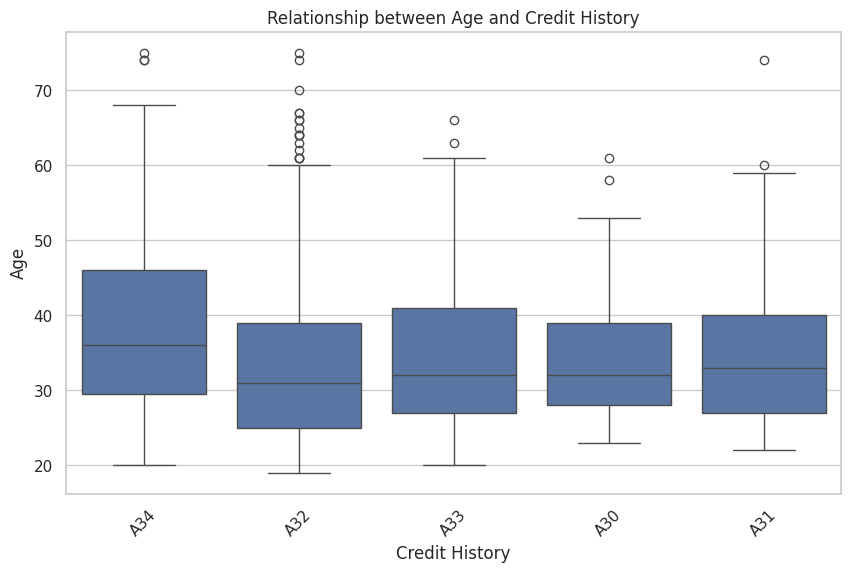

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style="whitegrid")

# Plot the relationship between 'age' and 'credit_history'
plt.figure(figsize=(10, 6))
sns.boxplot(x='credit_history', y='age', data=train_df)
plt.title('Relationship between Age and Credit History')
plt.xlabel('Credit History')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()


# We observe that the median age tends to vary across different credit history categories.


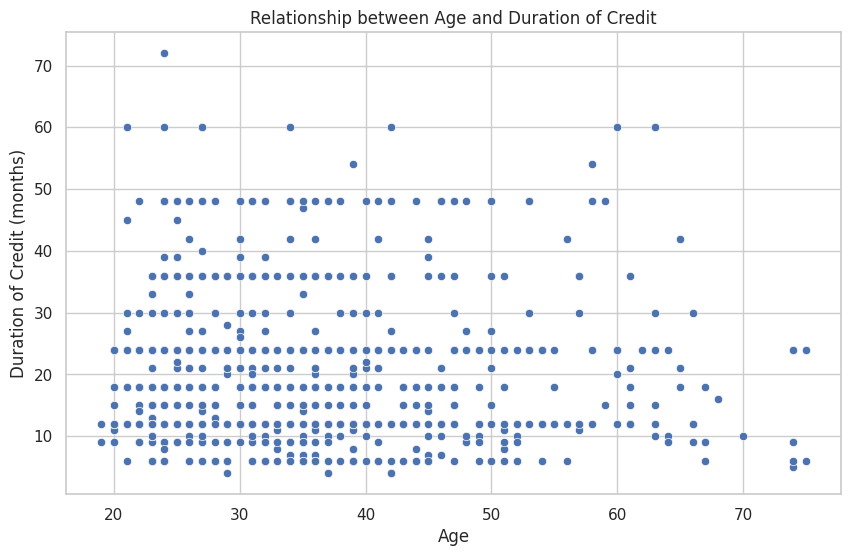

In [54]:
# Plot the relationship between 'age' and 'duration_month'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='duration_month', data=train_df)
plt.title('Relationship between Age and Duration of Credit')
plt.xlabel('Age')
plt.ylabel('Duration of Credit (months)')
plt.show()
# There doesn't appear to be a strong linear relationship between age and the duration of credit.
# However, we observe that most individuals with longer credit durations tend to be in the middle to older age range.
# There are also individuals of various ages with shorter credit durations, indicating that age alone may not be a strong predictor of credit duration.

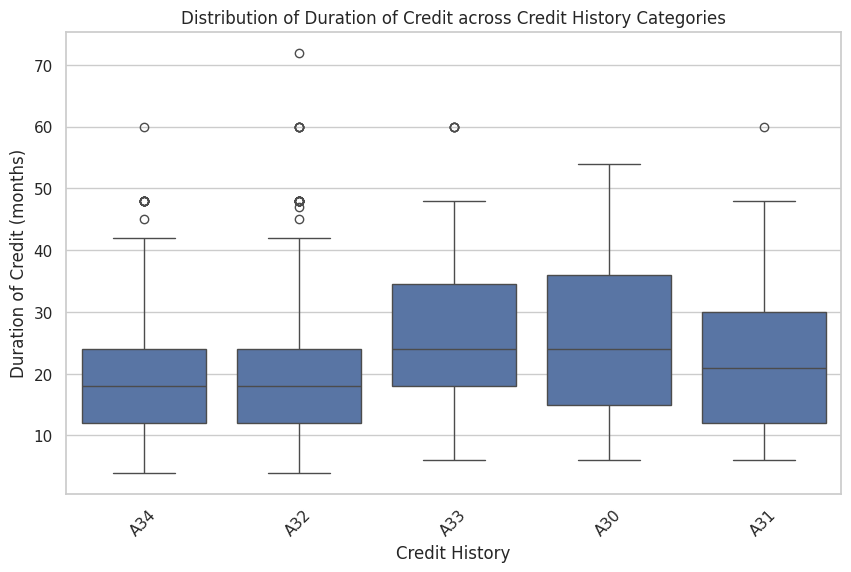

In [55]:
# Plot the distribution of 'duration_month' across different categories of 'credit_history'
plt.figure(figsize=(10, 6))
sns.boxplot(x='credit_history', y='duration_month', data=train_df)
plt.title('Distribution of Duration of Credit across Credit History Categories')
plt.xlabel('Credit History')
plt.ylabel('Duration of Credit (months)')
plt.xticks(rotation=45)
plt.show()


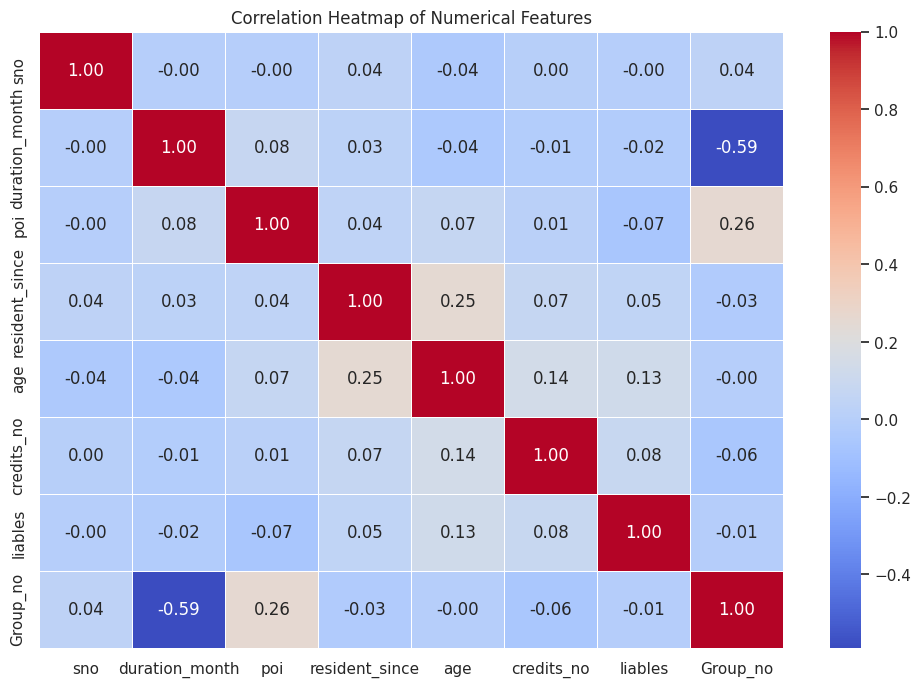

In [56]:
# Select numerical features only
numerical_features = train_df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numerical_features.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


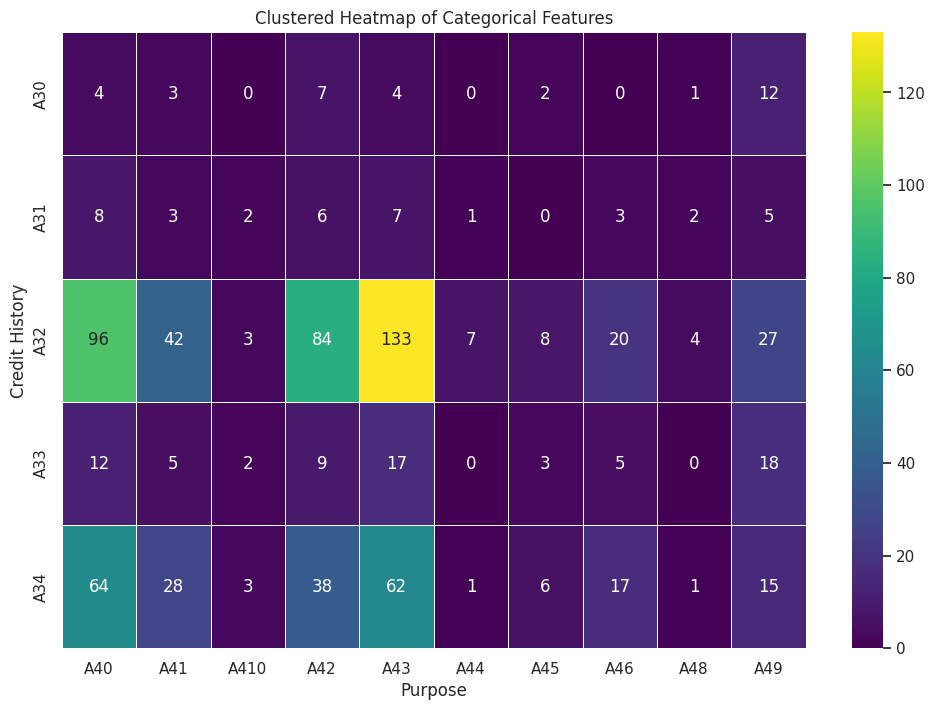

In [57]:
# Select categorical features only
categorical_features = train_df.select_dtypes(include=['object'])

# Compute the frequency table of combinations of categorical features
cross_tab = pd.crosstab(categorical_features['credit_history'], categorical_features['purpose'])

# Plot the clustered heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, cmap='viridis', annot=True, fmt='d', linewidths=0.5)
plt.title('Clustered Heatmap of Categorical Features')
plt.xlabel('Purpose')
plt.ylabel('Credit History')
plt.show()


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define features (X) and target (y)
X = train_df.drop(columns=['Group_no'])  # Exclude the target column 'Group_no'
y = train_df['Group_no']

# Define numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the baseline model (Logistic Regression)
baseline_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train the baseline model
baseline_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = baseline_model.predict(X_val)

# Evaluate the baseline model
accuracy = accuracy_score(y_val, y_val_pred)
print("Baseline Model Accuracy:", accuracy)


Baseline Model Accuracy: 0.6375


**Since again we've got low accuracy with LogisticRegression let's try another model  and see if we get more**

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Define hyperparameters grid for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20],  # Maximum depth of the trees
}

# Define pipeline with preprocessing and Random Forest classifier
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Perform grid search with 5-fold cross-validation
grid_search_rf = GridSearchCV(model_rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding accuracy
best_params_rf = grid_search_rf.best_params_
best_accuracy_rf = grid_search_rf.best_score_

print("Best Hyperparameters (Random Forest):", best_params_rf)
print("Best Accuracy (Random Forest, Cross-Validation):", best_accuracy_rf)


Best Hyperparameters (Random Forest): {'classifier__max_depth': None, 'classifier__n_estimators': 200}
Best Accuracy (Random Forest, Cross-Validation): 0.6671875


In [60]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters grid for KNN
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7],  # Number of neighbors
    'classifier__weights': ['uniform', 'distance'],  # Weight function used in prediction
    'classifier__p': [1, 2]  # Power parameter for Minkowski metric
}

# Define pipeline with preprocessing and KNN classifier
model_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Perform grid search with 5-fold cross-validation
grid_search_knn = GridSearchCV(model_knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding accuracy
best_params_knn = grid_search_knn.best_params_
best_accuracy_knn = grid_search_knn.best_score_

print("Best Hyperparameters (KNN):", best_params_knn)
print("Best Accuracy (KNN, Cross-Validation):", best_accuracy_knn)

# Evaluate the best KNN model on the validation set
best_model_knn = grid_search_knn.best_estimator_
y_val_pred = best_model_knn.predict(X_val)
accuracy_knn = accuracy_score(y_val, y_val_pred)
print("Accuracy on Validation Set (KNN):", accuracy_knn)

Best Hyperparameters (KNN): {'classifier__n_neighbors': 7, 'classifier__p': 2, 'classifier__weights': 'distance'}
Best Accuracy (KNN, Cross-Validation): 0.609375
Accuracy on Validation Set (KNN): 0.53125


In [61]:
## Since The RandomClassifier Got The Much Accuracy than other model we'll use that

In [62]:
# Load the test dataset
test_data = pd.read_csv("/content/drive/MyDrive/Bank_Classification_Data/C&T test dataset.csv")
test_data.head()

,sno,acc_info,duration_month,credit_history,purpose,savings_acc,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,A14,24,A34,A46,A61,A75,4.0,A93,A101,4,A124,54.0,A143,A153,2,A173,2,A191,A201
1,2,A12,18,A34,A43,A61,A75,3.0,A92,A103,4,A121,48.0,A141,A151,2,A172,1,A192,A201
2,3,A11,20,A34,A42,A61,A75,1.0,A92,A101,4,A122,24.0,A143,A152,2,A173,1,A191,A201
3,4,A14,12,A34,A43,A65,A75,4.0,A93,A101,4,A123,35.0,A143,A152,2,A173,1,A191,A201
4,5,A12,12,A32,A40,A65,A71,1.0,A92,A101,2,A121,24.0,A143,A151,1,A171,1,A191,A201


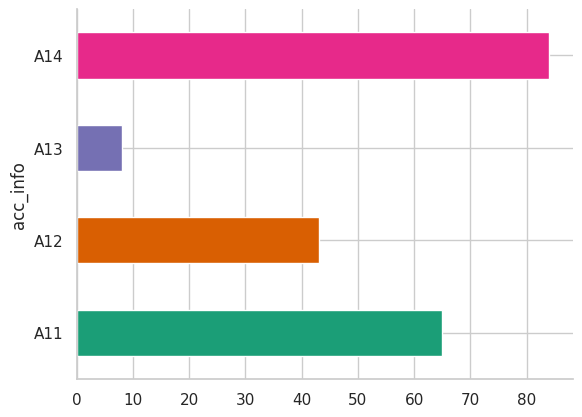

In [65]:

from matplotlib import pyplot as plt
import seaborn as sns
test_data.groupby('acc_info').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [71]:
X_test = test_data.copy()

# Make predictions on the test data
predictions = grid_search_rf.predict(X_test)

# Save predictions to a CSV file
test_data['Predicted_Group_no'] = predictions
test_data.to_csv("/content/drive/MyDrive/Bank_Classification_Data/C&T_test_predictions.csv", index=False)